In [1]:
!pip install lightgbm

  Using cached lightgbm-4.1.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for lightgbm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [46 lines of output]
      2023-11-25 23:31:28,720 - scikit_build_core - INFO - CMake version: 3.27.7
      *** scikit-build-core 0.6.1 using CMake 3.27.7 (wheel)
      2023-11-25 23:31:28,724 - scikit_build_core - INFO - Build directory: /private/var/folders/3_/x71n0dfx597b2bmnkl6m82hm0000gn/T/tmpyclktzqk/build
      *** Configuring CMake...
      2023-11-25 23:31:29,132 - scikit_build_core - INFO - Ninja version: 1.11.1
      2023-11-25 23:31:29,134 - scikit_build_core - WARNING - libdir/ldlibrary: /Users/daehyunkim/anaconda3/lib/libpython3.11.a is not a real file!
      2023-11-25 23:31:29,134 - scikit_build_core - WARNING - C

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tarfile import XGLTYPE
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
# from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data_1 = pd.read_excel("./Real_Estate_Top5_2020-2022.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: './Real_Estate_Top5_2020-2022.xlsx'

In [32]:
data_1.drop(labels=['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '번지', '본번', '부번'], axis=1, inplace=True)
data_1.dropna(axis=0, inplace=True)
data_1.reset_index(inplace=True)

In [33]:
data_2 = pd.read_excel("./External_data_total.xlsx")

In [34]:
data_2.drop(['Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'], axis=1,inplace=True)
data_2.dropna(axis=0, inplace=True)

In [35]:
data_2_index = data_2['계약년월']

In [36]:
data_2_tr = data_2.transpose()


In [37]:
data_2_tr.columns = ['건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)',
       '무역수지(백만불)', '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)',
       '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)', '생산자물가지수 총지수 ',
       '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ', '소비자물가지수 주택, 수도, 전기 및 연료',
       '가계대출 (연리%)', '경기종합지수(2020=100)', '경제활동인구_ 실업률(단위: %)',
       '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)',
       '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)',
       '주택매매가격지수(KB)_서울', '소비자물가지수_총지수(가중치:1000?)',
       '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원', '경기종합지수', 'S&P 500_close',
       'S&P 500_change_rate', 'NASDAQ_close', 'NASDAQ_change_rate',
       'DOW Jones_close', 'DOW Jones_change_rate', 'KRX300_close',
       'KRX300_change_rate', 'KOSPI_close', 'KOSPI_change_rate',
       'KOSDAQ_close', 'KOSDAQ_change_rate']
data_2_tr.drop(labels='계약년월', axis = 0, inplace=True)

In [38]:
add_data = []

for i in range(len(data_1)):
    index_value = data_1['계약년월'][i]
    if index_value in data_2_tr.index:
        add_data.append(data_2_tr.loc[index_value])

data_3 = pd.DataFrame(add_data)
data_3 = data_3.reset_index(drop=True)

data_3 = pd.concat([data_1, data_3], axis=1)

In [39]:
data = data_3
data

,index,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,...,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate
0,0,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202010,10,188200,10,2020,개포로 264,...,11435.234109,0.031253,28005.105025,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54
1,1,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202010,10,188200,10,2020,개포로 264,...,11435.234109,0.031253,28005.105025,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54
2,2,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202010,12,193000,4,2020,개포로 264,...,11435.234109,0.031253,28005.105025,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54
3,3,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202011,16,195000,17,2020,개포로 264,...,11794.461523,0.031414,29124.036621,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79
4,4,서울특별시 강남구 개포동,개포래미안포레스트,59.92,202011,26,195000,17,2020,개포로 264,...,11794.461523,0.031414,29124.036621,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19119,19119,서울특별시 중구 황학동,롯데캐슬,59.91,202212,24,63000,13,2008,청계천로 400,...,10838.995815,-0.012270,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89
19120,19120,서울특별시 중구 황학동,롯데캐슬,84.97,202212,26,85000,22,2008,청계천로 400,...,10838.995815,-0.012270,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89
19121,19121,서울특별시 중구 회현동1가,남산롯데캐슬아이리스,133.98,202206,9,225000,29,2011,소공로 35,...,11418.919085,-0.034727,31446.712798,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56
19122,19122,서울특별시 중구 회현동1가,남산롯데캐슬아이리스,133.98,202208,2,205000,20,2011,소공로 35,...,12570.260403,0.081533,33009.564878,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43


In [40]:
# object -> float 형으로 데이터타입 변환('단지명', '도로명' 제외)

# 숫자형으로 변환만 진행
data['매매가격지수(아파트)'] = data['매매가격지수(아파트)'].astype(float)
data['경제활동인구_ 실업률(단위: %)'] = data['경제활동인구_ 실업률(단위: %)'].astype(float)
data['경제활동인구_고용률(단위: %)'] = data['경제활동인구_고용률(단위: %)'].astype(float)
data['예금은행 대출금리(신규취급액 기준)_대출평균(연%)'] = data['예금은행 대출금리(신규취급액 기준)_대출평균(연%)'].astype(float)
data['예금은행 대출금리(잔액 기준)_총대출(연리%)'] = data['예금은행 대출금리(잔액 기준)_총대출(연리%)'].astype(float)
data['소비자물가지수_총지수(가중치:1000?)'] = data['소비자물가지수_총지수(가중치:1000?)'].astype(float)
data['경기종합지수'] = data['경기종합지수'].astype(float)

# 데이터 값들 사이에 ',' 제거 후 타입 변환
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)

CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)

current_balance = data['경상수지(백만불)']
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)

trade_balance = data['무역수지(백만불)']
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)

loan_amount = data['대출금액(아파트)(억원)']
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)

loan_balance = data['대출잔액(아파트)(억원)']
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)

new_pre_sale= data['서울_신규_분양세대(단위: 세대)']
for i in range(len(data)):
    new_pre_sale = new_pre_sale.apply(lambda x: pd.to_numeric(x.replace(',', ''), errors='coerce') if isinstance(x, str) and ',' in x else x)
data['서울_신규_분양세대(단위: 세대)'] = new_pre_sale

employed_person = data['경제활동인구_취업자(단위: 천명)']
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)

KOSPI = data['국제 주요국 주가지수(KOSPI)']
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)

KB_seoul = data['주택매매가격지수(KB)_서울']
KB_seoul_comma_removed = KB_seoul.apply(lambda x: x.replace(',', ''))
data['주택매매가격지수(KB)_서울'] = KB_seoul_comma_removed.astype(float)

KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [14]:
data_date_list = []

for index, row in data.iterrows():
    year_month = str(row['계약년월'])
    day = str(row['계약일']).zfill(2)
    data_date = year_month + day
    data_date_list.append(data_date)

print(data_date_list)

['20201010', '20201010', '20201012', '20201116', '20201126', '20201223', '20200117', '20200212', '20200213', '20200221', '20200311', '20200414', '20200422', '20200504', '20200504', '20200513', '20200519', '20200604', '20200607', '20200608', '20200617', '20200623', '20200623', '20200626', '20200629', '20200629', '20200702', '20200706', '20200708', '20200708', '20200709', '20200712', '20200716', '20200722', '20200730', '20200808', '20200808', '20200811', '20200909', '20201024', '20201025', '20201027', '20201027', '20201031', '20201204', '20201207', '20201216', '20201227', '20200104', '20200511', '20200520', '20200526', '20200530', '20200609', '20200613', '20200613', '20200613', '20200616', '20200619', '20200620', '20200620', '20200621', '20200621', '20200622', '20200622', '20200622', '20200622', '20200622', '20200622', '20200820', '20201031', '20200219', '20200620', '20200620', '20200620', '20200621', '20200220', '20200229', '20200523', '20200605', '20200616', '20200624', '20200721', '20

In [41]:
data_date = []

for i in range(len(data_date_list)):
    data_date.append(data_date_list[i][:4])

print(data_date)

['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020',

In [42]:
data_date_modified = pd.DataFrame({'계약연도': data_date})
data_date_modified

,계약연도
0,2020
1,2020
2,2020
3,2020
4,2020
...,...
19119,2022
19120,2022
19121,2022
19122,2022


In [43]:
data = pd.concat([data, data_date_modified], axis=1)

In [44]:
data_cost_per_pyeong = data['거래금액(만원)']/(data['전용면적(㎡)']/3.30579)

In [45]:
data_cost_per_pyeong = pd.DataFrame({'평당가' : data_cost_per_pyeong})
data = pd.concat([data, data_cost_per_pyeong], axis=1)

In [46]:
data = data.drop(labels=['index', '계약년월', '계약일', '전용면적(㎡)', '거래금액(만원)'],axis=1)

In [47]:
gu = data['시군구'].str.split()
gu

0         [서울특별시, 강남구, 개포동]
1         [서울특별시, 강남구, 개포동]
2         [서울특별시, 강남구, 개포동]
3         [서울특별시, 강남구, 개포동]
4         [서울특별시, 강남구, 개포동]
                ...        
19119      [서울특별시, 중구, 황학동]
19120      [서울특별시, 중구, 황학동]
19121    [서울특별시, 중구, 회현동1가]
19122    [서울특별시, 중구, 회현동1가]
19123    [서울특별시, 중구, 회현동1가]
Name: 시군구, Length: 19124, dtype: object

In [48]:
gu_each = []
for i in range(len(data)):
    gu_each.append(gu[i][1])

In [49]:
gu_each = pd.DataFrame({'매칭구' : gu_each})
data = pd.concat([data, gu_each], axis=1)
data = data.drop(labels=['시군구', '도로명'],axis=1)

In [50]:
apt_brand = []

for i in range(len(data)):
    if "래미안" in data['단지명'][i]:
        apt_brand.append("래미안")
    elif "자이" in data['단지명'][i]:
        apt_brand.append("자이")
    elif "롯데캐슬" in data['단지명'][i]:
        apt_brand.append("롯데캐슬")
    elif "푸르지오" in data['단지명'][i]:
        apt_brand.append("푸르지오")
    else:
        apt_brand.append("힐스테이트")

df = pd.DataFrame({'아파트 브랜드': apt_brand})
data = pd.concat([df, data], axis=1)

In [51]:
gu = data['매칭구']
gu.unique()

array(['강남구', '강동구', '강북구', '광진구', '구로구', '도봉구', '동대문구', '동작구', '마포구',
       '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
       '중구', '강서구', '금천구', '종로구', '중랑구', '관악구', '노원구'], dtype=object)

In [52]:
cluster_1 = ['강북구', '성북구', '은평구', '광진구', '서초구', '금천구']
cluster_2 = ['노원구', '중랑구', '강동구', '종로구', '중구', '서대문구', '용산구', '강남구', '마포구', '영등포구', '동작구', '관악구', '강서구', '양천구']
cluster_3 = ['성동구', '송파구']
cluster_4 = ['도봉구', '동대문구']
cluster_5 = ['구로구']
    
clustering = []

for i in range(len(gu)):
    if any(keyword in gu[i] for keyword in cluster_1):
        clustering.append("cluster 1")
    elif any(keyword in gu[i] for keyword in cluster_2):
        clustering.append("cluster 2")
    elif any(keyword in gu[i] for keyword in cluster_3):
        clustering.append("cluster 3")
    elif any(keyword in gu[i] for keyword in cluster_4):
        clustering.append("cluster 4")
    else:
        clustering.append("cluster 5")


In [53]:
clustering = pd.DataFrame({'클러스터링_구': clustering})

In [54]:
data = data.drop(labels=['매칭구'], axis=1)
data = pd.concat([data, clustering], axis=1)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Malg

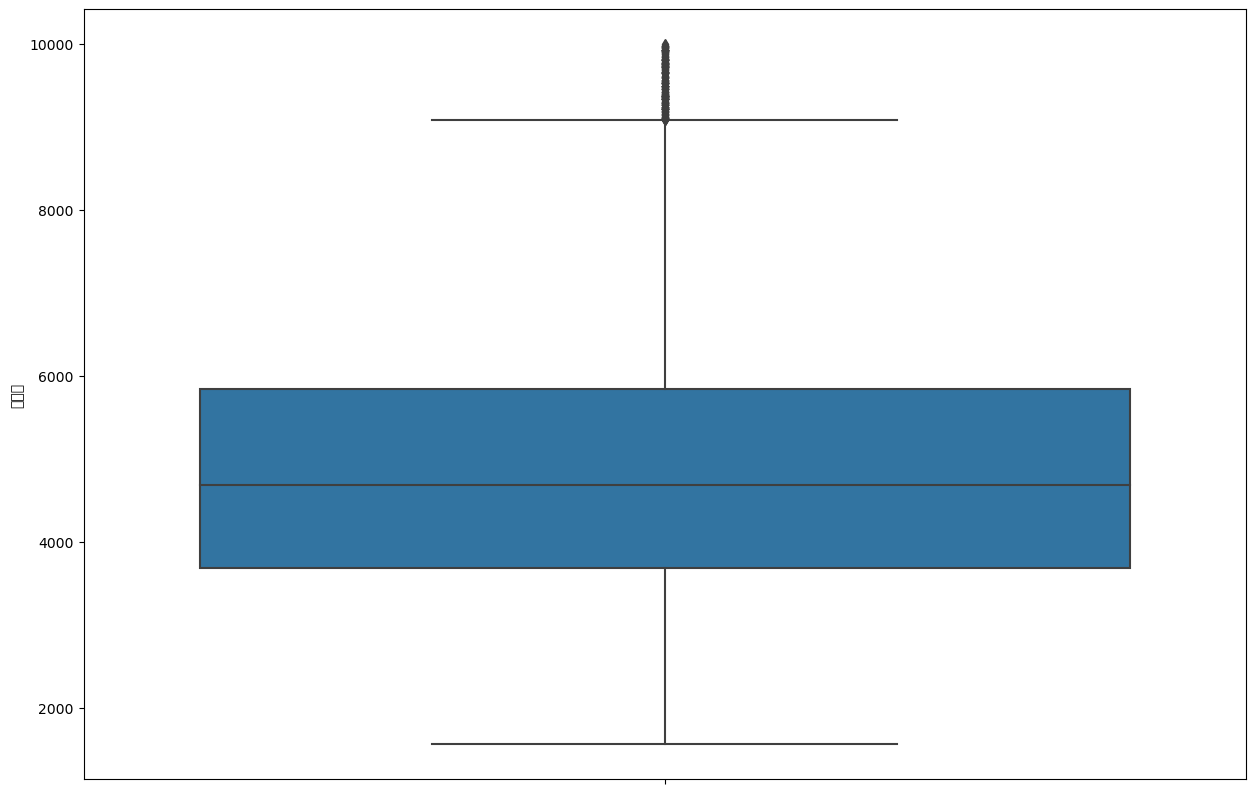

In [57]:
# 전체 이상치 확인
plt.rcParams['font.family'] = 'Malgun Gothic'
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(y='평당가',data=data)
#plt.xticks(rotation=90)
plt.show()

In [58]:
data_outlier_index = data[data['평당가'] > 10000].index
data.drop(index=data_outlier_index, inplace=True)

In [59]:
data.reset_index(drop=True, inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   아파트 브랜드                             18332 non-null  object 
 1   단지명                                 18332 non-null  object 
 2   층                                   18332 non-null  int64  
 3   건축년도                                18332 non-null  int64  
 4   건설수주_건축(단위 백만원)                     18332 non-null  float64
 5   건설수주_주택(단위 백만원)                     18332 non-null  float64
 6   매매가격지수(아파트)                         18332 non-null  float64
 7   경상수지(백만불)                           18332 non-null  float64
 8   무역수지(백만불)                           18332 non-null  float64
 9   대출금액(아파트)(억원)                       18332 non-null  float64
 10  대출잔액(아파트)(억원)                       18332 non-null  float64
 11  서울_신규_분양세대(단위: 세대)                  18332

In [61]:
data.drop(labels=['단지명'], axis=1, inplace=True)

In [62]:
data.to_csv("top5_data_before_target_encoding.csv")

In [63]:
data.columns

Index(['아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '평당가', '클러스터링_구'],
      dtype='object')

In [64]:
train = data[['아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '클러스터링_구']]
target = data[['평당가']]

In [65]:
train

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구
0,래미안,8,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,cluster 2
1,래미안,10,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,cluster 2
2,래미안,9,2019,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,35063.77793,...,28519.731600,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,2020,cluster 2
3,래미안,10,2019,7187557.0,5327314.0,94.3,-4024.0,-1663.0,20871.755,16239.20130,...,23293.899833,0.029000,1187.44,9.01,1947.56,10.99,645.18,13.37,2020,cluster 2
4,래미안,10,2019,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,24271.021387,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,2020,cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18327,롯데캐슬,13,2008,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,2022,cluster 2
18328,롯데캐슬,22,2008,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,32146.35769,...,33482.257254,0.001924,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,2022,cluster 2
18329,롯데캐슬,29,2011,19081016.0,9429872.0,104.1,6064.0,-2470.0,13267.086,12629.18263,...,31446.712798,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56,2022,cluster 2
18330,롯데캐슬,20,2011,13709893.0,7038729.0,103.4,-2912.0,-9422.0,8700.338,8243.44211,...,33009.564878,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,2022,cluster 2


In [66]:
target

,평당가
0,9647.193456
1,9495.929741
2,9457.011996
3,9922.827555
4,8951.081313
...,...
18327,3476.293941
18328,3306.957161
18329,5551.595387
18330,5058.120242


In [67]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(10998, 42) (3667, 42) (3667, 42) (10998, 1) (3667, 1) (3667, 1)


In [68]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [69]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(X_train.dtypes[X_train.dtypes == "object"].index) #object값 list에 넣음
categorical_features.append('계약연도')
# 추출된 문자열 변수 확인
display(categorical_features) #Target encoding 할 값 추출

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    X_train[i] = le.fit_transform(X_train[i], y_train)
    X_val[i] = le.transform(X_val[i], y_val)
    X_test[i] = le.transform(X_test[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(X_train)
display(X_test)

['아파트 브랜드', '서울_신규_분양세대(단위: 세대)', '계약연도', '클러스터링_구', '계약연도']

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구
8930,4564.418016,4,2010,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.239,14481.64281,...,26062.270153,0.073802,1294.84,4.59,2108.33,3.88,737.97,3.40,4557.982620,4361.711429
8628,4564.418016,5,2009,12384775.0,7770008.0,96.1,10672.0,8420.0,20667.710,17575.33408,...,27733.396391,-0.003162,1435.75,0.47,2327.89,0.07,848.15,-0.01,4557.982620,4361.711429
1168,5148.718800,8,2014,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.239,14481.64281,...,26062.270153,0.073802,1294.84,4.59,2108.33,3.88,737.97,3.40,4557.982620,4328.461133
12637,5371.921849,13,2010,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.713,19920.08895,...,34270.308594,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,5464.181511,5209.875129
831,5148.718800,21,2004,11356788.0,8224240.0,95.3,7226.0,3936.0,15551.155,12769.83118,...,26385.830877,0.012415,1387.50,7.16,2249.37,6.69,815.30,10.48,4557.982620,3313.292921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14092,4236.217028,9,2012,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.821,29943.84464,...,30148.579901,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4557.982620,5778.771163
5445,5148.718800,3,2004,13557522.0,6564711.0,101.7,6701.0,1584.0,19961.453,18651.12282,...,35243.965909,0.012792,1914.07,-0.52,3199.27,-0.10,1038.33,0.70,5464.181511,5209.875129
16406,4662.681663,2,2003,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.239,14481.64281,...,26062.270153,0.073802,1294.84,4.59,2108.33,3.88,737.97,3.40,4557.982620,5209.875129
4257,5148.718800,17,2003,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.821,29943.84464,...,30148.579901,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4557.982620,5209.875129


,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구
12699,5371.921849,2,2020,11932357.0,6696952.0,99.3,-223.0,-7076.0,26040.515,24825.32776,...,33417.958240,0.093137,1445.55,6.81,2472.53,7.80,729.54,4.92,5128.702256,5209.875129
4448,5148.718800,12,1998,12384775.0,7770008.0,96.1,10672.0,8420.0,20667.710,17575.33408,...,27733.396391,-0.003162,1435.75,0.47,2327.89,0.07,848.15,-0.01,4557.982620,5209.875129
4220,5148.718800,17,2003,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.239,14481.64281,...,26062.270153,0.073802,1294.84,4.59,2108.33,3.88,737.97,3.40,4557.982620,5209.875129
13378,4236.217028,3,2007,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,14229.74914,...,24271.021387,0.041948,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,5209.875129
18009,4662.681663,7,2008,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.713,19920.08895,...,34270.308594,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,5464.181511,4361.711429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,4236.217028,6,2004,11356788.0,8224240.0,95.3,7226.0,3936.0,15551.155,12769.83118,...,26385.830877,0.012415,1387.50,7.16,2249.37,6.69,815.30,10.48,4557.982620,5209.875129
5142,5148.718800,18,2014,12399581.0,6890717.0,104.1,6592.0,2973.0,16394.795,15353.93525,...,35848.570685,0.022623,1716.48,-3.38,2839.01,-4.43,965.63,-2.69,5464.181511,4328.461133
9690,4564.418016,15,2015,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.713,19920.08895,...,34270.308594,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,5464.181511,5209.875129
1964,5148.718800,16,2004,7008973.0,3937153.0,94.2,185.0,385.0,51355.404,37574.53298,...,28879.994327,0.025313,1291.81,-3.35,2119.01,-3.58,642.48,-4.08,4557.982620,5209.875129


In [70]:
X = pd.concat([X_train, X_test], axis=0)
X

,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구
8930,4564.418016,4,2010,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.239,14481.64281,...,26062.270153,0.073802,1294.84,4.59,2108.33,3.88,737.97,3.40,4557.982620,4361.711429
8628,4564.418016,5,2009,12384775.0,7770008.0,96.1,10672.0,8420.0,20667.710,17575.33408,...,27733.396391,-0.003162,1435.75,0.47,2327.89,0.07,848.15,-0.01,4557.982620,4361.711429
1168,5148.718800,8,2014,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.239,14481.64281,...,26062.270153,0.073802,1294.84,4.59,2108.33,3.88,737.97,3.40,4557.982620,4328.461133
12637,5371.921849,13,2010,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.713,19920.08895,...,34270.308594,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,5464.181511,5209.875129
831,5148.718800,21,2004,11356788.0,8224240.0,95.3,7226.0,3936.0,15551.155,12769.83118,...,26385.830877,0.012415,1387.50,7.16,2249.37,6.69,815.30,10.48,4557.982620,3313.292921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,4236.217028,6,2004,11356788.0,8224240.0,95.3,7226.0,3936.0,15551.155,12769.83118,...,26385.830877,0.012415,1387.50,7.16,2249.37,6.69,815.30,10.48,4557.982620,5209.875129
5142,5148.718800,18,2014,12399581.0,6890717.0,104.1,6592.0,2973.0,16394.795,15353.93525,...,35848.570685,0.022623,1716.48,-3.38,2839.01,-4.43,965.63,-2.69,5464.181511,4328.461133
9690,4564.418016,15,2015,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.713,19920.08895,...,34270.308594,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,5464.181511,5209.875129
1964,5148.718800,16,2004,7008973.0,3937153.0,94.2,185.0,385.0,51355.404,37574.53298,...,28879.994327,0.025313,1291.81,-3.35,2119.01,-3.58,642.48,-4.08,4557.982620,5209.875129


In [71]:
data_target_encoding = pd.concat([X, target], axis=1, ignore_index=False)
data_target_encoding.sort_index(ascending=True, inplace=True)

In [72]:
data_target_encoding.dropna(axis=0,inplace=True)

In [73]:
data_target_encoding.isnull().sum()

아파트 브랜드                               0
층                                     0
건축년도                                  0
건설수주_건축(단위 백만원)                       0
건설수주_주택(단위 백만원)                       0
매매가격지수(아파트)                           0
경상수지(백만불)                             0
무역수지(백만불)                             0
대출금액(아파트)(억원)                         0
대출잔액(아파트)(억원)                         0
서울_신규_분양세대(단위: 세대)                    0
아파트 동(호)수_(단위: 호)                     0
생산자물가지수 총지수                           0
전규모(1인이상) 전체임금총액[원]                   0
소비자물가지수 총지수                           0
소비자물가지수 주택, 수도, 전기 및 연료               0
가계대출 (연리%)                            0
경기종합지수(2020=100)                      0
경제활동인구_ 실업률(단위: %)                    0
경제활동인구_고용률(단위: %)                     0
경제활동인구_취업자(단위: 천명)                    0
국제 주요국 주가지수(KOSPI)                    0
예금은행 대출금리(신규취급액 기준)_대출평균(연%)          0
예금은행 대출금리(잔액 기준)_총대출(연리%)             0
주택매매가격지수(KB)_서울                       0


In [74]:
data_target_encoding_index = data_target_encoding.index
index = data.index

In [75]:
common_index = index.intersection(data_target_encoding_index)

In [76]:
data_target_encoding_without_null = data_target_encoding[data_target_encoding.index==common_index]

In [77]:
data_target_encoding_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14665 entries, 0 to 18330
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   아파트 브랜드                             14665 non-null  float64
 1   층                                   14665 non-null  float64
 2   건축년도                                14665 non-null  float64
 3   건설수주_건축(단위 백만원)                     14665 non-null  float64
 4   건설수주_주택(단위 백만원)                     14665 non-null  float64
 5   매매가격지수(아파트)                         14665 non-null  float64
 6   경상수지(백만불)                           14665 non-null  float64
 7   무역수지(백만불)                           14665 non-null  float64
 8   대출금액(아파트)(억원)                       14665 non-null  float64
 9   대출잔액(아파트)(억원)                       14665 non-null  float64
 10  서울_신규_분양세대(단위: 세대)                  14665 non-null  float64
 11  아파트 동(호)수_(단위: 호)                   14665

In [78]:
target

,평당가
0,9647.193456
1,9495.929741
2,9457.011996
3,9922.827555
4,8951.081313
...,...
18327,3476.293941
18328,3306.957161
18329,5551.595387
18330,5058.120242


In [79]:
target_without_null = target[target.index.isin(common_index)]

In [80]:
target_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14665 entries, 0 to 18330
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평당가     14665 non-null  float64
dtypes: float64(1)
memory usage: 229.1 KB


In [81]:
data_target_encoding = pd.concat([data_target_encoding_without_null, target_without_null], axis=1, ignore_index=False)

In [82]:
data_target_encoding.reset_index(inplace=True)

In [83]:
data_target_encoding.to_csv("top5_data_after_target_encoding.csv")

In [85]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_target_encoding_without_null.values, i) for i in range(data_target_encoding_without_null.shape[1])]
vif["features"] = data_target_encoding_without_null.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.027629e+00,층
1,1.081134e+00,아파트 브랜드
2,1.182585e+00,클러스터링_구
3,1.214998e+00,건축년도
4,1.635247e+00,평당가
5,7.544889e+01,경상수지(백만불)
6,1.198172e+02,KOSDAQ_change_rate
7,1.296279e+02,무역수지(백만불)
8,2.431154e+02,아파트 동(호)수_(단위: 호)
9,1.774096e+03,예금은행 대출금리(신규취급액 기준)_대출평균(연%)


In [86]:
vif[vif['VIF Factor']<=10]

,VIF Factor,features
0,1.027629,층
1,1.081134,아파트 브랜드
2,1.182585,클러스터링_구
3,1.214998,건축년도
4,1.635247,평당가


In [87]:
scaler = StandardScaler()
X_std = scaler.fit_transform(data_target_encoding_without_null)
X_std =  pd.DataFrame(X_std, columns=data_target_encoding_without_null.columns)

In [88]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_std.values, i) for i in range(X_std.shape[1])]
vif["features"] = X_std.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.027672e+00,층
1,1.081273e+00,아파트 브랜드
2,1.182979e+00,클러스터링_구
3,1.215033e+00,건축년도
4,1.635496e+00,평당가
5,3.368739e+02,경상수지(백만불)
6,2.989106e+03,예금은행 대출금리(신규취급액 기준)_대출평균(연%)
7,8.792662e+03,예금은행 대출금리(잔액 기준)_총대출(연리%)
8,1.117183e+04,경제활동인구_ 실업률(단위: %)
9,1.354894e+04,무역수지(백만불)


In [89]:
vif[vif['VIF Factor']<=10]

,VIF Factor,features
0,1.027672,층
1,1.081273,아파트 브랜드
2,1.182979,클러스터링_구
3,1.215033,건축년도
4,1.635496,평당가
